In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset
data = pd.read_csv("bank-additional-full.csv", sep=';')

In [5]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns."

'Dataset contains 41188 rows and 21 columns.'

In [11]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [13]:
# Class distribution
data['y'].value_counts(normalize=True) * 100

y
no     88.734583
yes    11.265417
Name: proportion, dtype: float64

**Data Preprocessing**

In [16]:
X = data.drop(columns=['y'])
y = data['y']

In [18]:
# Label binary features using Label Encoder
from sklearn.preprocessing import LabelEncoder
label_Encoder = LabelEncoder()
X['default'] = label_Encoder.fit_transform(X['default'])
X['housing'] = label_Encoder.fit_transform(X['housing'])
X['loan'] = label_Encoder.fit_transform(X['loan'])
y = label_Encoder.fit_transform(y)

In [20]:
# Label multi class fetures using One-Hot encoder
X = pd.get_dummies(X, columns=['job', 'marital', 'education', 'contact', 'day_of_week', 'month', 'poutcome'], drop_first=True)

In [24]:
# Split dataset into train and test data
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X,y,test_size=0.4, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)


<Axes: >

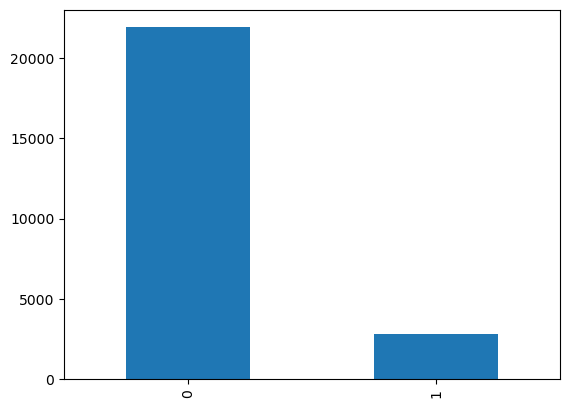

In [26]:
# y_train.value_counts().plot(kind='bar')
pd.Series(y_train).value_counts().plot(kind='bar')

In [96]:
# Handle data imbalancing using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train,y_train)

<Axes: >

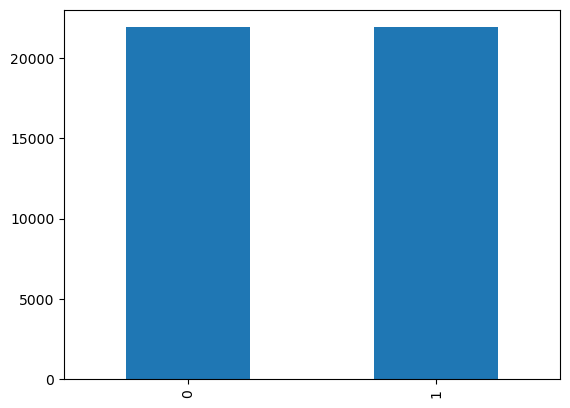

In [98]:
pd.Series(y_train_resampled).value_counts().plot(kind='bar')

In [100]:
# #Normalize numerical features
# from sklearn.preprocessing import StandardScaler

# numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
# scaler = StandardScaler()
# X_train_resampled_nn = scaler.fit_transform(X_train_resampled[numerical_cols])
# X_test_nn = scaler.fit_transform(X_test[numerical_cols])
# X_val_nn = scaler.fit_transform(X_val[numerical_cols])

***Random Forest Model***

In [35]:
# Model training with Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(class_weight='balanced', n_estimators=200, max_depth=20, min_samples_split=10, random_state=42)
rf_model.fit(X_train_resampled,y_train_resampled)

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_split=10, n_estimators=200, random_state=42)

In [37]:
# Make predictions 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred_rf)

print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.9104
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      7343
           1       0.58      0.66      0.62       895

    accuracy                           0.91      8238
   macro avg       0.77      0.80      0.78      8238
weighted avg       0.92      0.91      0.91      8238



***Neural Network Model***

In [102]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Neural Network Architecture for Non-Normalized Data
nn_model = Sequential()

# Input layer
nn_model.add(Dense(128, input_dim=X_train_resampled.shape[1], activation='relu'))

# First hidden layer
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dropout(0.3))

# Second hidden layer
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dropout(0.2))

# Third hidden layer
nn_model.add(Dense(16, activation='relu'))

# Output layer
nn_model.add(Dense(1, activation='sigmoid'))

# Model Summary
nn_model.summary()


C:\Users\githm\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 128)            │         6,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,409 (68.00 KB)

 Trainable params: 17,409 (68.00 KB)

 Non-trainable params: 0 (0.00 B)

In [110]:
# Compile the model
nn_model.compile( loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [112]:
# Train the model
history = nn_model.fit(X_train_resampled, y_train_resampled, validation_data=(X_val, y_val), epochs=50, batch_size = 32)

Epoch 1/50
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5852 - loss: 4.4290 - val_accuracy: 0.8901 - val_loss: 0.6050
Epoch 2/50
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6039 - loss: 0.6632 - val_accuracy: 0.8910 - val_loss: 0.5429
Epoch 3/50
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6896 - loss: 0.5920 - val_accuracy: 0.8543 - val_loss: 0.5090
Epoch 4/50
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7127 - loss: 0.5743 - val_accuracy: 0.8565 - val_loss: 0.4956
Epoch 5/50
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7245 - loss: 0.5611 - val_accuracy: 0.7997 - val_loss: 0.5116
Epoch 6/50
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7488 - loss: 0.5303 - val_accuracy: 0.9098 - val_loss: 0.4140
Epoch 7/50
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7606 - loss: 0.5144 - val_accuracy: 0.7418 - val_loss: 0.5798
Epoch 8/50
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7687 - loss: 0.5037 -

In [124]:
# Predict on test data
y_pred_nn = (nn_model.predict(X_test) > 0.4).astype(int).flatten()

# Evaluate the model
test_loss, test_accuracy = nn_model.evaluate(X_test, y_test, verbose=1)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(classification_report(y_test, y_pred_nn))

258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9102 - loss: 0.2026
Test Loss: 0.2060
Test Accuracy: 0.9062
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7343
           1       0.58      0.49      0.53       895

    accuracy                           0.91      8238
   macro avg       0.76      0.72      0.74      8238
weighted avg       0.90      0.91      0.90      8238



***Model Comparison***

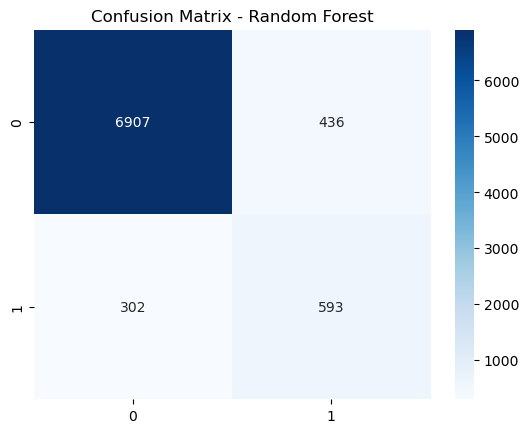

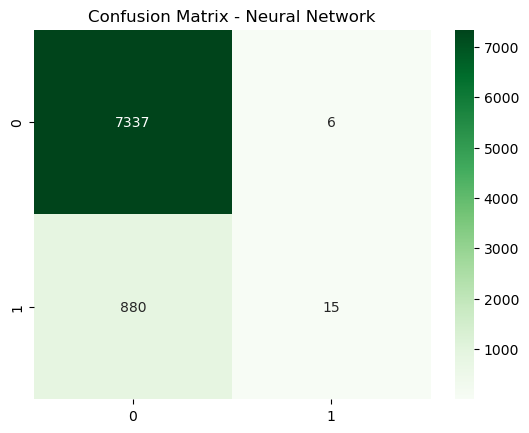

In [116]:
# Confusion Matrix for Random Forest
cf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Confusion Matrix for Neural Network
cf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cf_matrix_nn, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Neural Network")
plt.show()

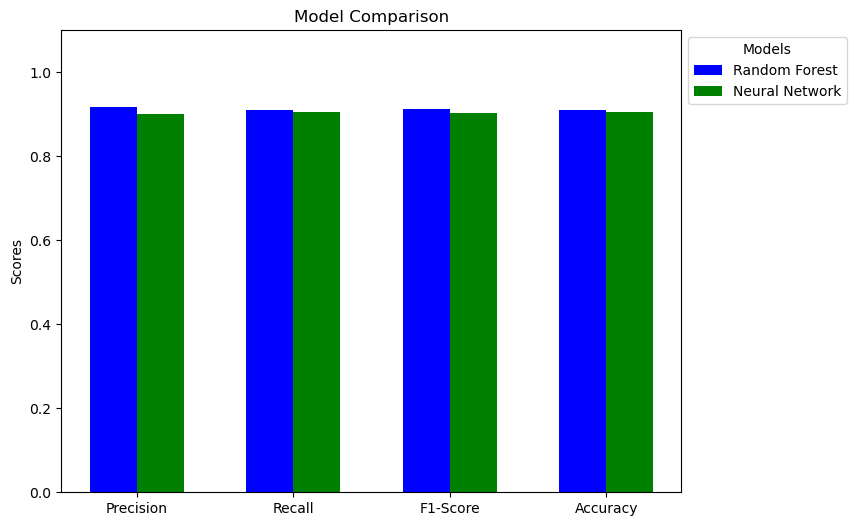

In [126]:
report_rf = classification_report(y_test, y_pred_rf, output_dict=True) 
report_nn = classification_report(y_test, y_pred_nn, output_dict=True)

# Extract metrics for Random Forest
precision_rf = report_rf['weighted avg']['precision']
recall_rf = report_rf['weighted avg']['recall']
f1_score_rf = report_rf['weighted avg']['f1-score']
accuracy_rf = report_rf['accuracy']

# Extract metrics for Neural Network
precision_nn = report_nn['weighted avg']['precision']
recall_nn = report_nn['weighted avg']['recall']
f1_score_nn = report_nn['weighted avg']['f1-score']
accuracy_nn = report_nn['accuracy']

data = {
    "Metrics": ["Precision", "Recall", "F1-Score", "Accuracy"],
    "Random Forest": [precision_rf, recall_rf, f1_score_rf, accuracy_rf],
    "Neural Network": [precision_nn, recall_nn, f1_score_nn, accuracy_nn],
}

# Metrics and scores
metrics = data["Metrics"]
rf_scores = data["Random Forest"]
nn_scores = data["Neural Network"]

# Plot bar chart
x = np.arange(len(metrics))
width = 0.3

fig, ax = plt.subplots(figsize=(8, 6))

rf_colors = ['blue'] * len(metrics) 
nn_colors = ['green'] * len(metrics) 

ax.bar(x - width/2, rf_scores, width, label='Random Forest', color=rf_colors)
ax.bar(x + width/2, nn_scores, width, label='Neural Network', color=nn_colors)

ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_title('Model Comparison')
ax.set_ylabel('Scores')
ax.set_ylim(0, 1.1)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Models')

plt.show()
